# Human Activity Recognition with Smartphones

We will be working on the Human Activity Recognition with Smartphones database, it has been built using the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.


The dataset consists of :

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
* Triaxial Angular velocity from the gyroscope.
* 561-feature vector with time and frequency domain variables.
* Activity label.

In [15]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("smartphone-data.csv",delimiter = ",")

In [3]:
# check dataset's datatypes
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

All of the columns in the dataset is float (numerical) type except the target column `Activity`, we can visualize down bwlow.

In [4]:
df.tail(5).dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

`Check whether all the columns are scaled - mininimum value : -1 and maximum value : 1 `

In [5]:
print(df.iloc[:,:-1].min().value_counts())
print(df.iloc[:,:-1].max().value_counts())

-1.0    561
dtype: int64
1.0    561
dtype: int64


Yes all the columns are scaled.

`Now we have to check is our target column is balanced for each class`

In [6]:
df.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

The classes seems pretty much balanced.

Since the __activity columns is object type__, and our logistic regression would not be able to apprehend it. Therefor we must need to convert this column into numerical for each class, we can use __LabelEncoder__ to do do our job.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)

1859    3
5511    2
1783    2
4932    1
1746    5
Name: Activity, dtype: int32

In [8]:
# check for correalation between different variables

feature_columns = df.columns[:-1]
corr_values = df[feature_columns].corr()

In [9]:
#remove values bwlow the diagonal
trill_index = np.tril_indices_from(corr_values)

In [10]:
# change unused columns to NaN
for coor in zip(*trill_index):
    corr_values.iloc[coor[0],coor[1]] = np.NaN

In [11]:
# stack the data into dataframe
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'Feature 1',
                                'level_1':'Feature 2',
                                0:'correlation'}))

In [12]:
# since the correalation values are in the range of -1 t0 1. Therefor we add another column for absolute values for the corr.
corr_values['abs_correlation'] = corr_values['correlation'].abs()

In [18]:
corr_values

,Feature 1,Feature 2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


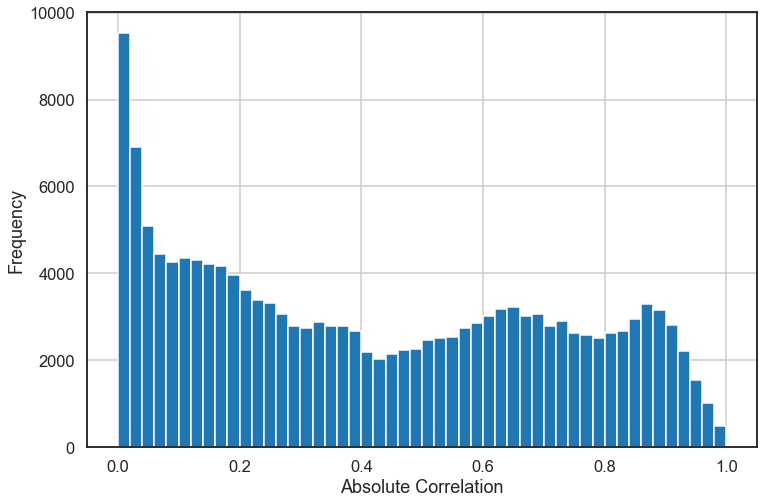

In [17]:
# plot the histogram or frequency count for each unique correaltion
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [19]:
# the features that are highly correlated
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,Feature 1,Feature 2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


These columns have very high correaltion which means that one column can be used instead of the other. For eg area and volume of a object will have high correlation with each other since they are both interelated.